In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from zipfile import ZipFile

In [31]:
# Create a ZipFile Object and load sample.zip in it
with ZipFile('house-prices-advanced-regression-techniques.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall('data')

In [126]:
df_train = pd.read_csv(r'data/train.csv') #將資料變成dataframe
df_test  = pd.read_csv(r'data/test.csv')
df_train #印出資料查看資料內容
df_train['SaleCondition'].unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

In [33]:
#先看看基本資料們
print(df_train.shape) #查看trian的形狀，以方便後來訂定神經網路的輸入層
print(df_test.shape)  #查看test形狀
print('*'*50)
print(df_train.dtypes) #看一下訓練資料的各個欄位的型態

(1460, 81)
(1459, 80)
**************************************************
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [122]:
df_train.drop("Id",inplace = True,axis=1) #inplace = True會直接把原本的data改掉，axis=1才會刪除 行
df_test.drop("Id",inplace = True,axis=1)  #inplace = True會直接把原本的data改掉，axis=1才會刪除 行
df_train.head(5) #.head()可以查看前幾筆資料，括號填入數字


KeyError: "['Id'] not found in axis"

## 相關係數範例

In [35]:
x = np.random.randint(0, 100, 10)
y = 5 * x 
z = np.random.randint(0,100,10)
dataframe = pd.DataFrame({'x':x,'y':y,'z':z})
dataframe

,x,y,z
0,82,410,55
1,8,40,35
2,61,305,92
3,86,430,93
4,64,320,67
5,31,155,45
6,30,150,43
7,18,90,93
8,11,55,61
9,61,305,83


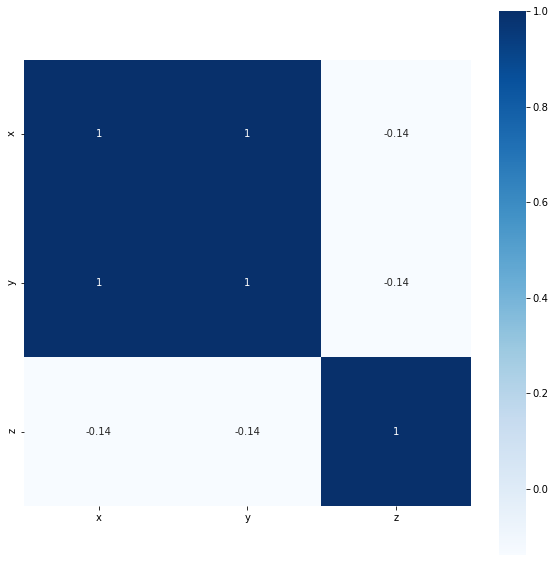

In [62]:
df =dataframe.corr() #計算相關係數
plt.subplots(figsize=(10, 10))  # 設置長寬尺寸大小
sns.heatmap(df, annot=True, vmax=1, square=True, cmap="Blues")
#1.丟入的資料 2.是否輸出熱力圖數值大小 3.最大值顯示4.變成正方形5.要什麼顏色
plt.show()

<AxesSubplot:>

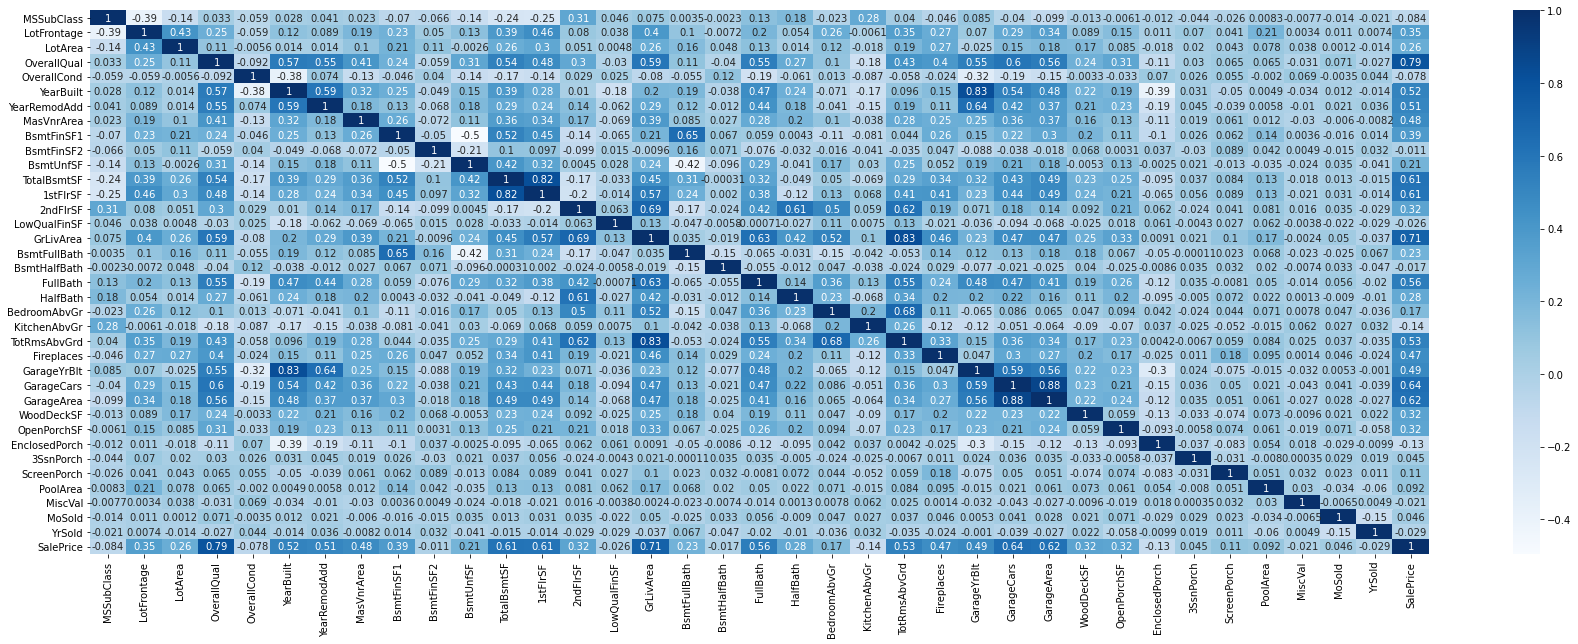

In [36]:
trian_corr =df_train.corr() #計算相關係數
plt.subplots(figsize=(30, 10))  # 設置長寬尺寸大小
sns.heatmap(trian_corr, annot=True, vmax=1, cmap="Blues")

In [47]:
high_corr = trian_corr.index[abs(trian_corr["SalePrice"])>0.6]
#abs是取絕對值的意思
#abs(trian_corr["SalePrice"])>0.6 這句的意思是與SalePrice有關的係數>0.6的判別式，它會輸出True(大於0.6)或是False
#abs(trian_corr["SalePrice"])>0.6 會丟回一堆True和False，放在原本的trian_corr.index[]就會把是大於0.6的傳回去
print(high_corr) 

Index(['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars',
       'GarageArea', 'SalePrice'],
      dtype='object')


## 補充相關係數

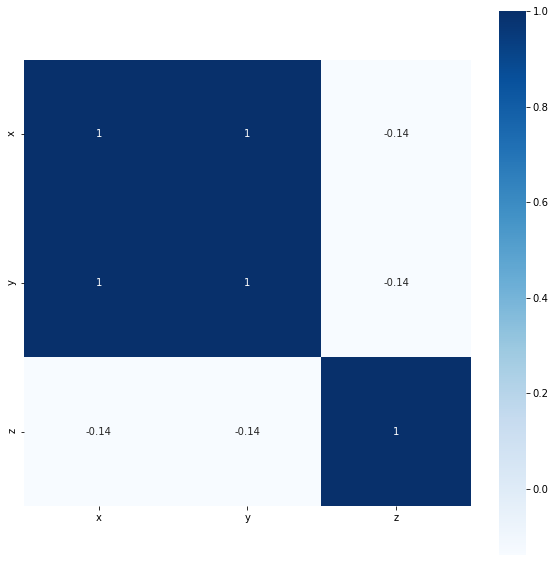

In [37]:
x = np.random.randint(0, 100, 10) #0~100隨機找10筆數據
y = 5 * x 
z = np.random.randint(0,100,10)
l = ['a','b','c','d','e','f','g','h','i','j'] #新增的

dataframe = pd.DataFrame({'x':x,'y':y,'z':z,'l':l})

df =dataframe.corr() #計算相關係數
plt.subplots(figsize=(10, 10))  # 設置長寬尺寸大小
sns.heatmap(df, annot=True, vmax=1, square=True, cmap="Blues")
#1.丟入的資料 2.是否輸出熱力圖數值大小 3.最大值顯示4.變成正方形5.要什麼顏色
plt.show()

### One-Hot-Encoding

In [21]:
name = ['John','Jason','Jenny']
df_data = pd.DataFrame(name)
print(df_data)
#以上是基本的建立資料
one_hot_data = pd.get_dummies(df_data) 
#Pandas裡面有get_dummies函數，可以直接進行One-Hot Encoding
pd.DataFrame(one_hot_data)

       0
0   John
1  Jason
2  Jenny


,0_Jason,0_Jenny,0_John
0,0,0,1
1,1,0,0
2,0,1,0


### Label Encoding

In [28]:
name = ['John','Jason','Jenny']
df_data = pd.DataFrame(name)
print(df_data)
#以上是基本的建立資料
from sklearn.preprocessing import LabelEncoder #導入LabelEncoder工具
df_data[0] = LabelEncoder().fit_transform(df_data[0])
#LabelEncoder()只能鎖定一行，所以要特別標註是哪行
df_data

       0
0   John
1  Jason
2  Jenny


,0
0,2
1,0
2,1


In [48]:
float_data = trian_corr.index #是float或int的的傢伙
print(float_data)
all_col = df_train.columns #全部的col
object_data = []
for i in range(len(all_col)): #查找全部的all_col，len(all_col)是長度(要全部找過一遍)
    if all_col[i] not in float_data: #如果在float_data裡面沒有，表示它是object幫的
        object_data.append(all_col[i]) #不是就加上去
print(len(object_data))
print(object_data) #object 種類

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual'

In [112]:
df_train.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [118]:
from sklearn.preprocessing import LabelEncoder
#df_train[pd.isnull(df_train)]  = 'NaN'
for i in object_data: #將轉換是object的傢伙轉換，從object_data陣列一個一個抓出來改造
        df_train[i] = LabelEncoder().fit_transform(df_train[i].factorize()[0]) 
        #df_train[i] = df_train[i]
        #pd.factorize()[0]會給nans(缺失值)一個-1的值，若沒寫這個，會造成等號兩邊不等的情況
df_train


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,60,0,65.0,8450,0,0,0,0,0,...,0,0,0,0,0,2,2008,0,0,208500
1,1,20,0,80.0,9600,0,0,0,0,0,...,0,0,0,0,0,5,2007,0,0,181500
2,2,60,0,68.0,11250,0,0,1,0,0,...,0,0,0,0,0,9,2008,0,0,223500
3,3,70,0,60.0,9550,0,0,1,0,0,...,0,0,0,0,0,2,2006,0,1,140000
4,4,60,0,84.0,14260,0,0,1,0,0,...,0,0,0,0,0,12,2008,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,60,0,62.0,7917,0,0,0,0,0,...,0,0,0,0,0,8,2007,0,0,175000
1456,1456,20,0,85.0,13175,0,0,0,0,0,...,0,0,1,0,0,2,2010,0,0,210000
1457,1457,70,0,66.0,9042,0,0,0,0,0,...,0,0,3,1,2500,5,2010,0,0,266500
1458,1458,20,0,68.0,9717,0,0,0,0,0,...,0,0,0,0,0,4,2010,0,0,142125


### 測試pd.factorize

In [114]:
aaa = pd.factorize(pd.Series(['a',np.nan]))
aaa

(array([ 0, -1]), Index(['a'], dtype='object'))

### 計算相關係數

(81, 81)


<AxesSubplot:>

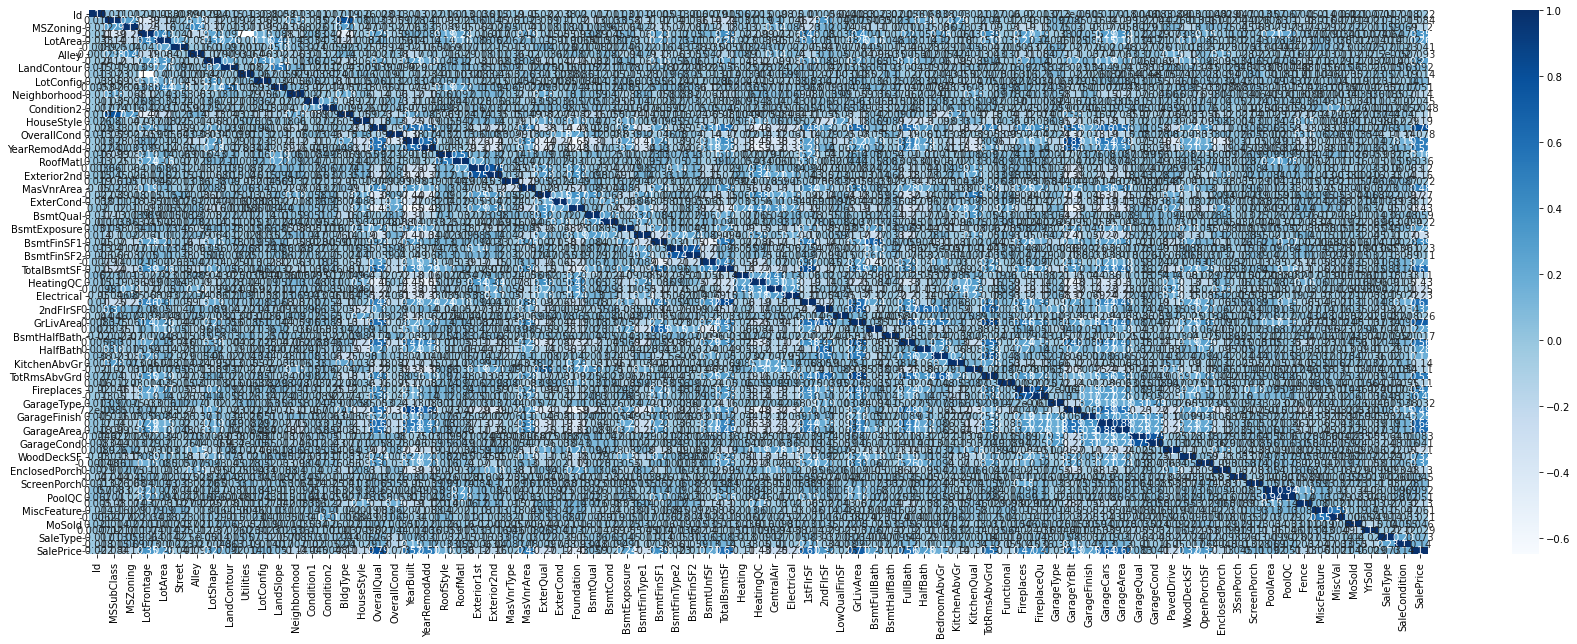

In [116]:
trian_corr =df_train.corr() #計算相關係數
print(trian_corr.shape) #查看形狀
plt.subplots(figsize=(30, 10))  # 設置長寬尺寸大小
sns.heatmap(trian_corr, annot=True, vmax=1, cmap="Blues")

In [117]:
high_corr = trian_corr.index[abs(trian_corr["SalePrice"])>0.6]
#abs是取絕對值的意思
#abs(trian_corr["SalePrice"])>0.6 這句的意思是與SalePrice有關的係數>0.6的判別式，它會輸出True(大於0.6)或是False
#abs(trian_corr["SalePrice"])>0.6 會丟回一堆True和False，放在原本的trian_corr.index[]就會把是大於0.6的傳回去
print(high_corr)

Index(['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars',
       'GarageArea', 'SalePrice'],
      dtype='object')


In [ ]:
### 移除相關系統小於 0.6

In [128]:
for i in df_train.columns: #查找原本資料中所有columns
    if i not in high_corr: #如果沒有相關係數大於0.6的話
        df_train = df_train.drop(i,axis=1) #就把它拔掉
df_train

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,SalePrice
0,7,856,856,1710,2,548,208500
1,6,1262,1262,1262,2,460,181500
2,7,920,920,1786,2,608,223500
3,7,756,961,1717,3,642,140000
4,8,1145,1145,2198,3,836,250000
...,...,...,...,...,...,...,...
1455,6,953,953,1647,2,460,175000
1456,6,1542,2073,2073,2,500,210000
1457,7,1152,1188,2340,1,252,266500
1458,5,1078,1078,1078,1,240,142125


In [131]:
train_targets = df_train["SalePrice"].values #把SalePrice這行數值整個拉出來
train_data = df_train.drop(columns=["SalePrice"]) #刪除SalePrice這行
print(train_targets)
print("*"*50)
train_data

[208500 181500 223500 ... 266500 142125 147500]
**************************************************


,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea
0,7,856,856,1710,2,548
1,6,1262,1262,1262,2,460
2,7,920,920,1786,2,608
3,7,756,961,1717,3,642
4,8,1145,1145,2198,3,836
...,...,...,...,...,...,...
1455,6,953,953,1647,2,460
1456,6,1542,2073,2073,2,500
1457,7,1152,1188,2340,1,252
1458,5,1078,1078,1078,1,240


### 切分出驗證集

In [132]:
from sklearn.model_selection import train_test_split
X_train,X_validation,Y_trian,Y_validation = train_test_split(train_data, train_targets, test_size=0.2, random_state=42)
#X_train,X_test, y_train, y_test = model_selection.train_test_split(train_data,train_target,test_size=0.2, random_state=0)
#train_test_split的括號裡面，1.資料的x那些種類2.y的部分3.X_test的部分要佔全部資料的多少(我們這裡是驗證集唷)4.指定一個隨機種子，0的話就是隨機囉
#就是一種隨機切分資料的功能
#隨機種子相同的話，在另一個框框在跑一次一樣的code還是會出現相同的隨機數
print(X_train.shape)
print(Y_trian.shape)
print('*'*50)
print(X_validation.shape)
print(Y_validation.shape)
X_train_dataset = X_train.values #取出數值，轉換回list
X_validation_dataset = X_validation.values
print(X_train_dataset)

(1168, 6)
(1168,)
**************************************************
(292, 6)
(292,)
[[   5 1314 1314 1314    1  294]
 [   6  799  799 1571    2  380]
 [   5  796  796  796    0    0]
 ...
 [   5  864  864  864    2  572]
 [   7  912  912 1426    1  216]
 [   7 1373 1555 1555    3  660]]
